# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [99]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import requests


In [100]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [101]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [102]:
# Create a Beautiful Soup Object
html_content = browser.html
page = soup(html_content, 'html.parser')
table = page.find('table')

In [105]:
# Extract all rows of data
data = []
rows = table.find_all('tr')
for row in rows: 
    cells = row.find_all('td')
    row_data = [cell.get_text().strip() for cell in cells]
    data.append(row_data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [106]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=['id', 'terretrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


        id terretrial_date   sol    ls month min_temp pressure
0     None            None  None  None  None     None     None
1        2      2012-08-16    10   155     6    -75.0    739.0
2       13      2012-08-17    11   156     6    -76.0    740.0
3       24      2012-08-18    12   156     6    -76.0    741.0
4       35      2012-08-19    13   157     6    -74.0    732.0
...    ...             ...   ...   ...   ...      ...      ...
1863  1889      2018-02-23  1973   133     5    -78.0    730.0
1864  1892      2018-02-24  1974   134     5    -77.0    729.0
1865  1894      2018-02-25  1975   134     5    -76.0    729.0
1866  1893      2018-02-26  1976   135     5    -77.0    728.0
1867  1895      2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


In [111]:
# Confirm DataFrame was created successfully
df = df.drop(index=0)
print(df)


        id terretrial_date   sol   ls month min_temp pressure
1        2      2012-08-16    10  155     6    -75.0    739.0
2       13      2012-08-17    11  156     6    -76.0    740.0
3       24      2012-08-18    12  156     6    -76.0    741.0
4       35      2012-08-19    13  157     6    -74.0    732.0
5       46      2012-08-20    14  157     6    -74.0    740.0
...    ...             ...   ...  ...   ...      ...      ...
1863  1889      2018-02-23  1973  133     5    -78.0    730.0
1864  1892      2018-02-24  1974  134     5    -77.0    729.0
1865  1894      2018-02-25  1975  134     5    -76.0    729.0
1866  1893      2018-02-26  1976  135     5    -77.0    728.0
1867  1895      2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [108]:
# Examine data type of each column
print(df.dtypes)

id                 object
terretrial_date    object
sol                object
ls                 object
month              object
min_temp           object
pressure           object
dtype: object


In [112]:
# Change data types for data analysis
df['terretrial_date'] = pd.to_datetime(df['terretrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [113]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                         object
terretrial_date    datetime64[ns]
sol                         int32
ls                          int32
month                       int32
min_temp                  float64
pressure                  float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [114]:
# 1. How many months are there on Mars?
months = df['terretrial_date'].dt.month.nunique()
months

12

In [116]:
# 2. How many Martian days' worth of data are there?
mDays = df['sol'].nunique()
mDays

1867

In [118]:
# 3. What is the average low temperature by month?
avgLowTemp = df.groupby(df['terretrial_date'].dt.month)['min_temp'].mean()
avgLowTemp

terretrial_date
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

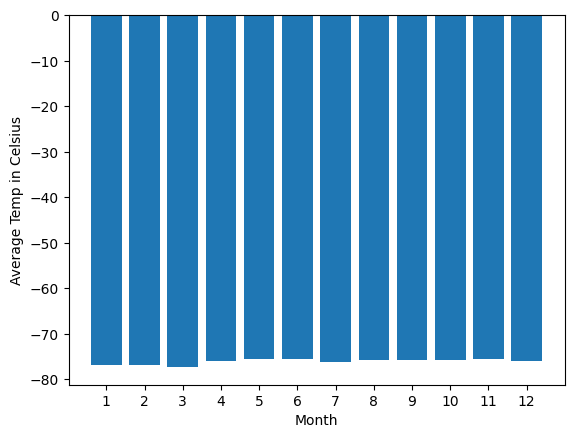

In [125]:
# Plot the average temperature by month
plt.bar(avgLowTemp.index, avgLowTemp.values)
plt.xlabel('Month')
plt.ylabel('Average Temp in Celsius')
plt.xticks(range(1,13))
plt.show

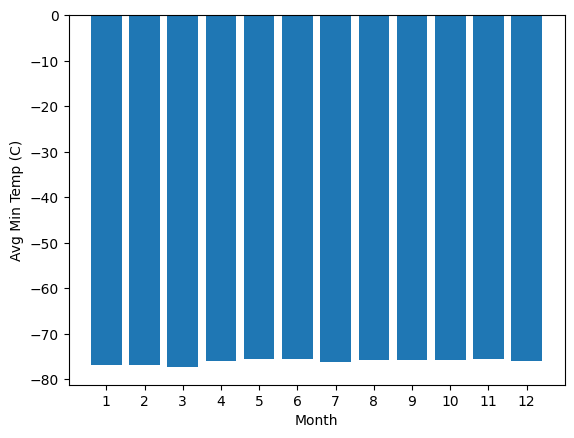

In [130]:
# Identify the coldest and hottest months in Curiosity's location
df['month'] = df['terretrial_date'].dt.month
averageTempByMonth = df.groupby('month')['min_temp'].mean()
coldest = averageTempByMonth.idxmin()
hottest = averageTempByMonth.idxmax()

plt.bar(averageTempByMonth.index, averageTempByMonth.values)
plt.xlabel('Month')
plt.ylabel('Avg Min Temp (C)')
plt.xticks(range(1,13))
plt.show()


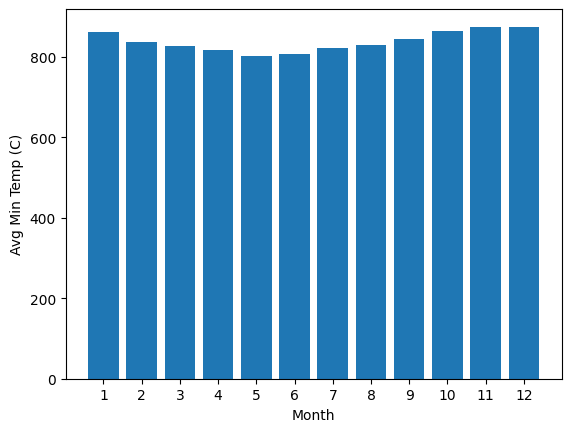

In [131]:
# 4. Average pressure by Martian month
averagePressureByMonth = df.groupby('month')['pressure'].mean()
lowestP = averagePressureByMonth.idxmin()
highestP = averagePressureByMonth.idxmax()

plt.bar(averagePressureByMonth.index, averagePressureByMonth.values)
plt.xlabel('Month')
plt.ylabel('Avg Min Temp (C)')
plt.xticks(range(1,13))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

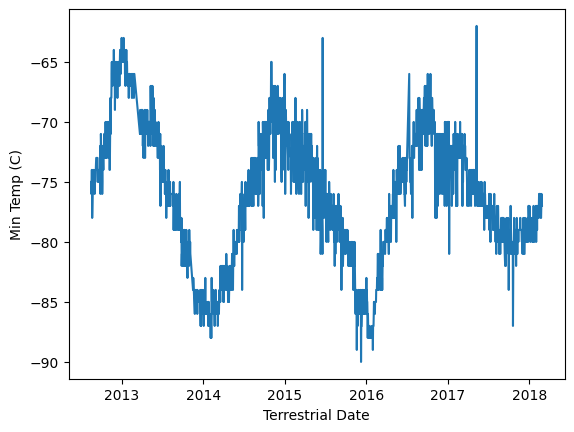

In [132]:
plt.plot(df['terretrial_date'], df['min_temp'])
plt.xlabel('Terrestrial Date')
plt.ylabel('Min Temp (C)')
plt.show

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [133]:
# Write the data to a CSV
df.to_csv('mars_data.csv')

In [134]:
browser.quit()